## SIFT Scale Invariant Feature Transform

平移不变特征变换（SIFT，Scale-Invariant Feature Transform）是一种用于图像特征提取的算法，它能够检测图像中的关键点，并计算这些关键点的方向和尺度。

### 图像尺度空间

尺度空间是一种将图像在不同尺度下进行处理的数学工具。在尺度空间中，图像被放大或缩小，以检测不同尺度的特征。

SIFT算法使用高斯金字塔来实现尺度空间。

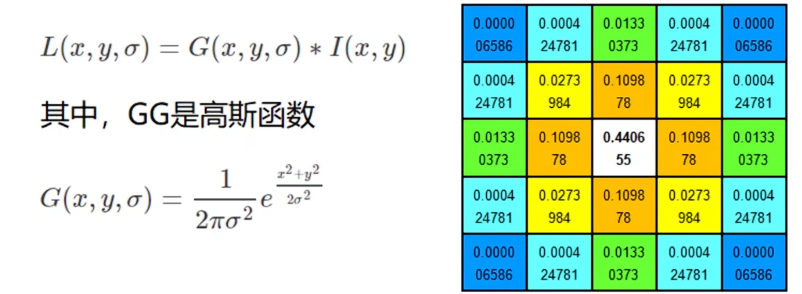

高斯滤波器是一种平滑图像的方法，它可以将图像中的噪声和细节模糊掉，从而突出图像中的特征。

会越来越模糊，sigel越大，模糊程度越大

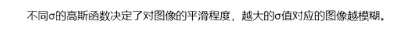

高斯金字塔由多组不同尺度的图像组成，每组图像都由原始图像通过高斯模糊得到。高斯模糊是一种平滑图像的方法，它可以将图像中的噪声和细节模糊掉，从而突出图像中的特征。

### 多分辨率图像金字塔

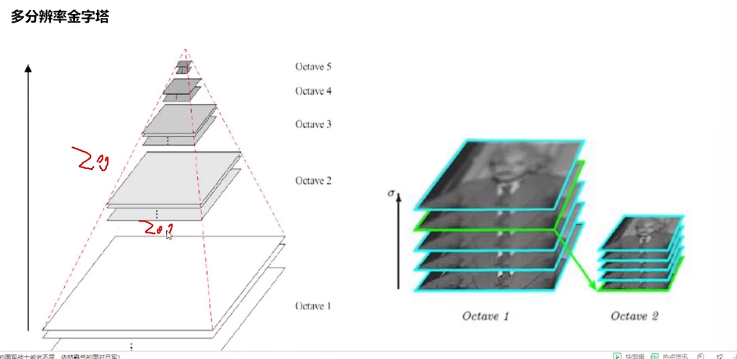

### 高斯差分金字塔（DOG）

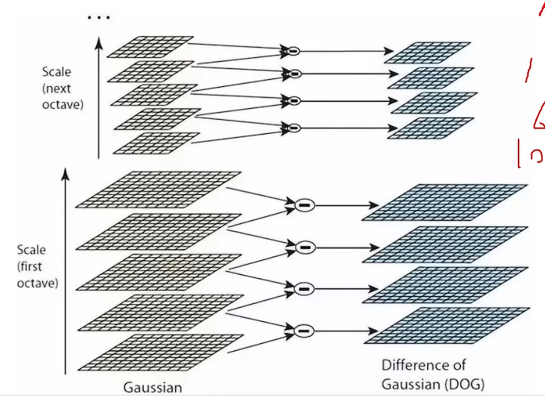

进行区分的过程中，会进行高斯模糊，然后进行差分，得到高斯差分金字塔

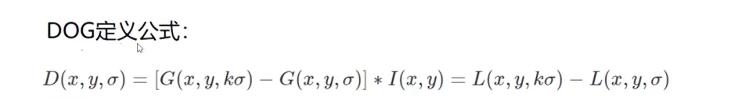

### DOG空间极值检测

为了寻找尺度空间中的极值点，我们需要在DOG空间中进行极值检测。具体来说，我们需要在每个尺度空间中，对每个像素点进行以下操作：

做完DOG后，每一个点都要跟它周围的点（上下左右除了自身）进行比较，如果它比周围的点都大，那么它就是一个极值点，也就是关键点

1. 检查该像素点在水平方向和垂直方向上的梯度值。
2. 检查该像素点在尺度方向上的梯度值。
3. 检查该像素点在水平方向和垂直方向上的梯度值是否大于其相邻像素点的梯度值。
4. 检查该像素点在尺度方向上的梯度值是否大于其相邻像素点的梯度值。
如果满足以上所有条件，则该像素点就是一个极值点。

### 关键点精确定位

这些候选关键点是DOG空间的局部极值点，而且这些极值点为离散的点，精确定位极值点的方法是对尺度空间DOG函数进行曲线拟合，即对每个候选关键点进行二次泰勒展开，然后求导，找到极值点，从而实现关键点的精确定位。

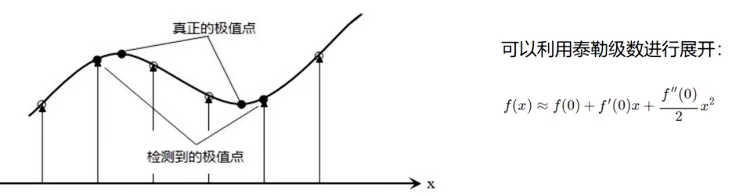

求导后其实就是求近似值

矢量表示

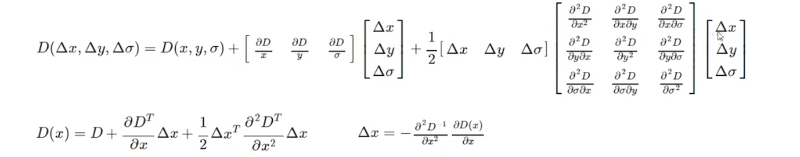

对极值点进行拟合、修正，得到更精确的关键点位置

### 消除边界响应

类比节点检测

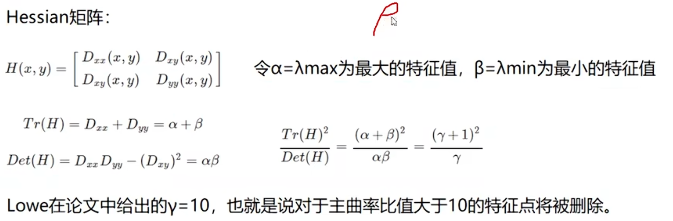

为了消除边缘效应，我们需要对关键点进行筛选。具体来说，我们需要检查关键点所在的图像区域是否具有明显的边缘特征。如果关键点所在的图像区域具有明显的边缘特征，那么我们就认为该关键点是一个边界响应，需要将其删除。

### 特征点主方向

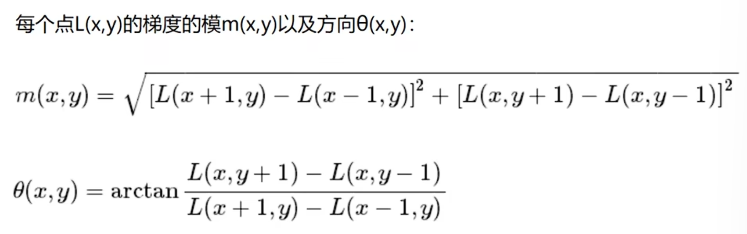

每个特征点可以得到三个信息，位置、尺度、方向，这样无论图像如何旋转，特征点都能够保持不变，从而实现了尺度不变性。

### 生成特征描述

在完成关键点梯度计算后，使用直方图统计关键点周围像素的梯度方向，生成一个具有独特性的128维特征向量，用于特征匹配。

8个方向，每个方向10个bin，每个bin是4*4的窗口，所以是128维

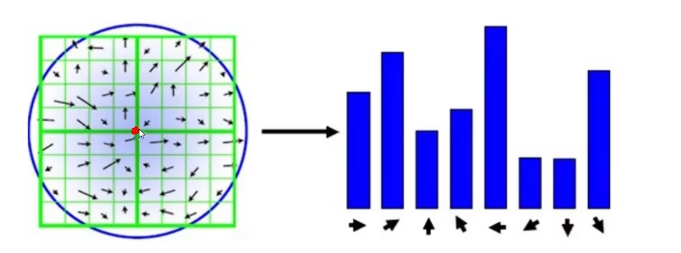

* 如果重合方向大于0.8，则认为重合

为了保证特征矢量的旋转不变性，在生成特征描述时，需要将特征点旋转到主方向上，然后再生成特征描述。

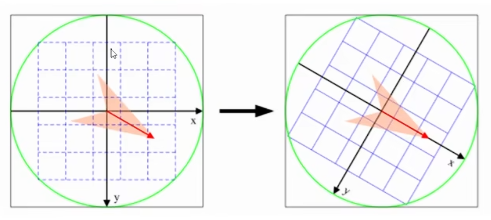

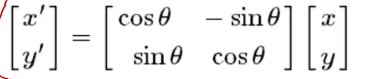

旋转之后的主方向为中心取8x8的窗口，求每个像素的梯度幅值和方向，箭头方向代表梯度方向，长度代表梯度幅值，然后利用高斯窗口对其进行加权运算，最后在每个4x4的小块上绘制8个方向的梯度直方图，计算每个梯度方向的累加值，即可形成一个种子点，即每个特征的由4个种子点组成，每个种子点有8个方向的向量信息。

* 论文建议对每个关键点使用4*4共16个种子点，每个种子点使用8个方向，每个方向使用4*4的窗口，所以每个关键点有128维的特征描述。

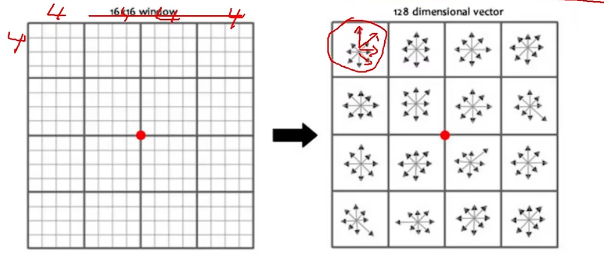

### （上面为了保证效果作了很多预处理操作）

#### opencv SIFT函数

In [2]:
import cv2
import numpy as np

img=cv2.imread('lena.jpg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
cv2.__version__

'4.10.0'

得到特征点

In [4]:
sift=cv2.xfeatures2d.SIFT_create() #opencv3
kp,des=sift.detectAndCompute(gray,None) #kp是关键点，des是描述符
img=cv2.drawKeypoints(gray,kp,img) #绘制关键点
cv2.imshow('sift_keypoints.jpg',img)
cv2.waitKey()

-1

计算特征

In [5]:
kp,des=sift.compute(gray,kp)

In [6]:
print(np.array(des).shape)

(1100, 128)


In [7]:
des.shape

(1100, 128)